In [69]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
%matplotlib inline

In [130]:
q=2
dev = qml.device("default.qubit", wires=q)

In [208]:
X=np.random.randn(100,2**q)
X=X/np.reshape(np.linalg.norm(X,axis=1),(-1,1))

Y=np.abs(np.fft.fft(X,axis=1))**2/(2**q)

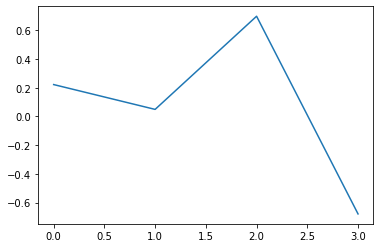

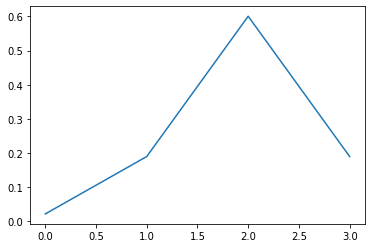

In [210]:
plt.plot(X[50,:])
plt.show()
plt.plot(Y[50,:])
plt.show()

In [211]:
@qml.qnode(dev)
def quantum_neural_net(params, x=None):
    # Encode input x into quantum state
    qml.QubitStateVector(x,wires=[0,1])
    
    for i in range(q):
        qml.RX(params[i*3], wires=i)
        qml.RY(params[i*3+1], wires=i)
        qml.RZ(params[i*3+2], wires=i)

    return qml.probs(wires=[0, 1])  #[qml.expval(qml.PauliZ(i)) for i in range(2)]

In [212]:
quantum_neural_net(var, x=X[0,:])

array([0.0572932 , 0.38383386, 0.23271042, 0.32616252])

In [217]:
print(quantum_neural_net.draw())

 0: ──╭QubitStateVector(M0)──RX(-2.16)──RY(2.308)──RZ(0.002)───╭┤ Probs 
 1: ──╰QubitStateVector(M0)──RX(2.667)──RY(2.025)──RZ(-0.358)──╰┤ Probs 
M0 =
[-0.41139791  0.69568504  0.58378698  0.0772454 ]



In [213]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [214]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x=x) for x in features]
    return square_loss(labels, preds)

In [215]:
#Variable Initialization
var_init=np.random.rand(q*3)*2*np.pi-np.pi
print(var_init)

[-2.16001847e+00  2.30800003e+00  1.50124676e-03  2.66693680e+00
  2.02541652e+00 -3.58267034e-01]


In [216]:
opt = AdamOptimizer(0.2, beta1=0.9, beta2=0.999)

var = var_init
for it in range(10):
    var = opt.step(lambda v: cost(v, X, Y), var)
    print("Iter: {:5d} | Cost: {:0.7f} ".format(it + 1, cost(var, X, Y)))

Autograd ArrayBox with value [0.49087975 0.15966005 0.15688588 0.19257431]
Autograd ArrayBox with value [0.1818461  0.26074513 0.53420295 0.02320582]
Autograd ArrayBox with value [0.56171842 0.16778356 0.25891554 0.01158248]
Autograd ArrayBox with value [0.09631875 0.18549498 0.05823019 0.65995607]
Autograd ArrayBox with value [0.39233934 0.1398777  0.23599318 0.23178978]
Autograd ArrayBox with value [0.34385426 0.04082689 0.54512057 0.07019827]
Autograd ArrayBox with value [0.31480636 0.09905183 0.12186646 0.46427535]
Autograd ArrayBox with value [0.25545621 0.25122709 0.12370583 0.36961088]
Autograd ArrayBox with value [0.57562163 0.25426865 0.07196004 0.09814968]
Autograd ArrayBox with value [0.28382991 0.47955832 0.02770118 0.20891058]
Autograd ArrayBox with value [0.3838649  0.10322808 0.25644154 0.25646548]
Autograd ArrayBox with value [0.58201333 0.16514966 0.11627007 0.13656695]
Autograd ArrayBox with value [0.5624724  0.21429347 0.16221848 0.06101566]
Autograd ArrayBox with va

TypeError: Grad only applies to real scalar-output functions. Try jacobian, elementwise_grad or holomorphic_grad.

In [200]:
predictions = [quantum_neural_net(var, x=x) for x in X]

In [204]:
np.shape(Y)

(100,)

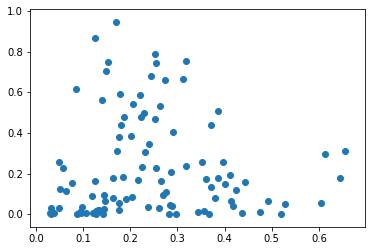

In [205]:
plt.scatter(p00,Y)

![](../demonstrations/quantum_neural_net/qnn_output_30_0.png)


